In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl

In [14]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [4]:
import cv2
from skimage.data import coins

## 임계처리

<function matplotlib.pyplot.show(close=None, block=None)>

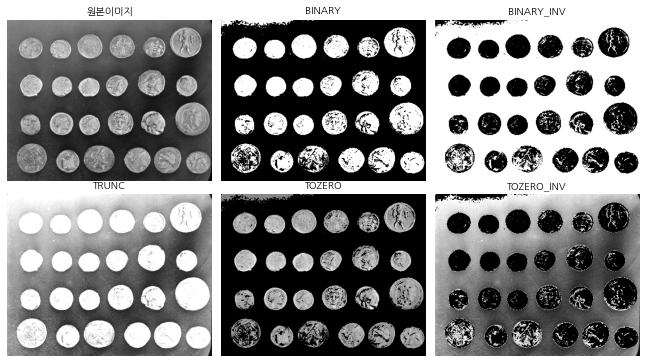

In [15]:
img = coins()

maxval = 255
thresh = maxval / 2

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['원본이미지', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize':10})
    plt.axis('off')
    
plt.tight_layout(pad=0.7)
plt.show

## 적응임계처리

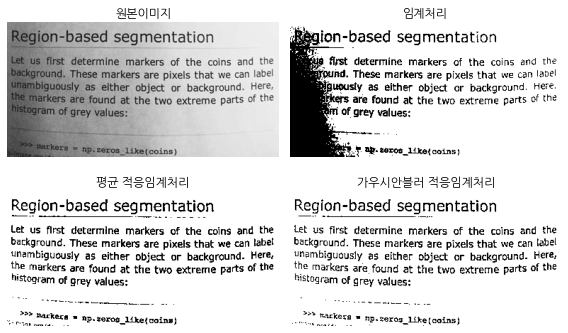

In [23]:
from skimage.data import page

img = page()

maxval = 255
thresh = 126
ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
c = 20

th2 = cv2.adaptiveThreshold(
       img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, c)
th3 = cv2.adaptiveThreshold(
       img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, c)

image = [img, th1, th2, th3]
titles = ['원본이미지', '임계처리', '평균 적응임계처리', '가우시안블러 적응임계처리']

plt.figure(figsize=(8, 5))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

## 이미지 필터링

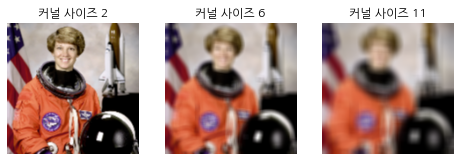

In [26]:
import cv2
from skimage.data import astronaut

img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize = (8, 3))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k **2
    filtering = cv2.filter2D(img, -1,kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(filtering)
    plt.title('커널 사이즈 {}'.format(k))
    plt.axis('off')
    
plt.show()

## 평균블러

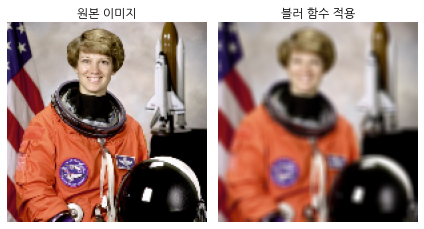

In [29]:
blur = cv2.blur(img, (5, 5))
boxfilter = cv2.boxFilter(img, -1, (5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('원본 이미지')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title('블러 함수 적용')
plt.axis('off')

plt.tight_layout()
plt.show()

## 중앙값 블러

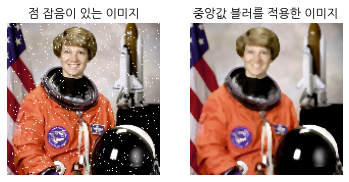

In [36]:
# 점 잡음 적용
img_noise = img.copy()

np.random.seed()
N = 500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255

# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title('점 잡음이 있는 이미지')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title('중앙값 블러를 적용한 이미지')
plt.axis('off')

plt.show()

## 가우시안 블러

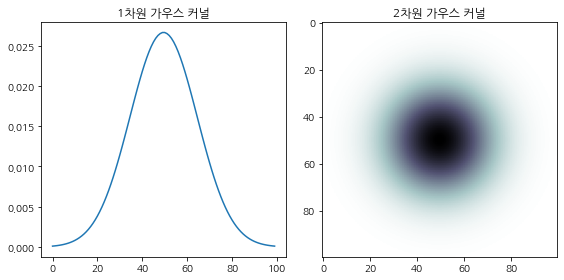

In [46]:
gauss1d = cv2.getGaussianKernel(100, 15)
gauss2d = gauss1d @ gauss1d.T

plt.figure(figsize= (8, 4))

plt.subplot(121)
plt.plot(gauss1d)
plt.title('1차원 가우스 커널')

plt.subplot(122)
plt.imshow(gauss2d, cmap=mpl.cm.bone_r)
plt.title('2차원 가우스 커널')

plt.tight_layout()
plt.show()

## 양방향 필터링

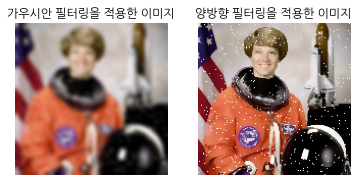

In [48]:
img_denoise1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75,75)

plt.subplot(1, 2, 1)
plt.imshow(img_denoise1)
plt.title('가우시안 필터링을 적용한 이미지')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_denoise2)
plt.title('양방향 필터링을 적용한 이미지')
plt.axis('off')

plt.show()

## 형태적변환

In [49]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [50]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [51]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### 침식기법

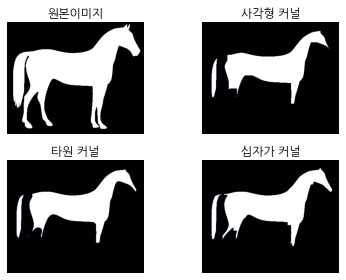

In [59]:
from skimage.data import horse

img = horse().astype('uint8')
img = np.ones(img.shape) - img

ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title = ["사각형 커널", "타원 커널", "십자가 커널"]


plt.subplot(2, 2, 1)
plt.imshow(img,cmap='gray')
plt.title('원본이미지')
plt.axis('off')
for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap='bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 팽창

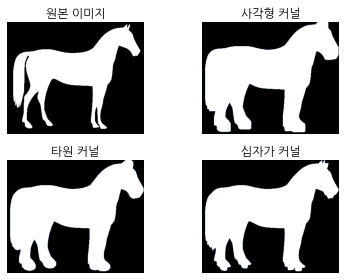

In [61]:
plt.subplot(2, 2, 1)
plt.imshow(img, cmap ='gray')
plt.title('원본 이미지')
plt.axis('off')
for i in range(3):
    erosion = cv2.dilate(img, kernel[i])
    plt.subplot(2, 2, i + 2)
    plt.imshow(erosion, cmap = 'bone')
    plt.title(title[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

### 그레디언트, 오프닝, 클로징

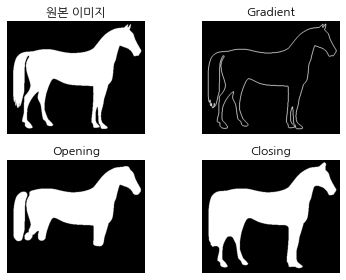

In [62]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)

images = [img, gradient, opening, closing]
titles = ["원본 이미지", 'Gradient', 'Opening', 'Closing']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()